In [2]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, ADASYN

In [3]:
data = pd.read_csv('Yoke_Data_Robot_Input.csv')

In [4]:
#pca
pca1 = PCA(n_components=1)
pc_d_l = principalComponents = pca1.fit_transform(data[['CAR_AGE IN DAYS','LIFE TO DATE MILEAGE']])
data['PCA_d_l']=pc_d_l
#data = data.drop(['Mileage_since_last _failure','weeks_in_service'],axis = 1)

In [5]:
#pca
pca1 = PCA(n_components=1)
pc_w_m = principalComponents = pca1.fit_transform(data[['Mileage since Last Replacement','COMPONENT_AGE IN DAYS']])
data['PCA_w_m']=pc_w_m
#data = data.drop(['Mileage_since_last _failure','weeks_in_service'],axis = 1)

In [6]:
data.head()

,CAR NUMBER,LOCATION,CURRENT_CONDITION_CODE,SHOP_INITIAL,Last Replacement Date,Mileage since Last Replacement,Car_Class,Equipment_Feature_Desc,BUILT DATE,Builder_Name,...,AVG_Loaded_Trip_Duration_Days,AVG_Loaded_Distance_Miles,AVG_Empty_Trip_Duration_Days,AVG_Empty_Distance_Miles,Pocket_Type,Pocket_Number,COMPONENT_AGE IN DAYS,CAR_AGE IN DAYS,PCA_d_l,PCA_w_m
0,83500,A,C_1,0,7/3/1986,800739,GSH64,64 ft 100T,7/3/1986,GUND,...,20.329629,1060.389629,14.625925,581.204074,0,P_nan,11934,11934,222167.543748,349146.252715
1,83500,B,C_1,0,7/3/1986,800739,GSH64,64 ft 100T,7/3/1986,GUND,...,20.329629,1060.389629,14.625925,581.204074,0,P_nan,11934,11934,222167.543748,349146.252715
2,83503,A,C_1,0,7/8/1986,798885,GSH64,64 ft 100T,7/8/1986,GUND,...,30.188571,1083.472571,16.408571,802.380571,0,P_nan,11929,11929,220313.572853,347292.327344
3,83503,B,C_1,0,7/8/1986,798885,GSH64,64 ft 100T,7/8/1986,GUND,...,30.188571,1083.472571,16.408571,802.380571,0,P_nan,11929,11929,220313.572853,347292.327344
4,83505,A,C_1,0,7/8/1986,848482,GSH64,64 ft 100T,7/8/1986,GUND,...,17.542857,1087.278367,17.858333,861.054375,0,P_nan,11929,11929,269908.601790,396885.717062


In [7]:
data['CURRENT_CONDITION_CODE'] = pd.factorize(data.CURRENT_CONDITION_CODE)[0]
data['SHOP_INITIAL'] = pd.factorize(data.SHOP_INITIAL)[0]
data['Equipment_Feature_Desc'] = pd.factorize(data.Equipment_Feature_Desc)[0]
data['Builder_Name'] = pd.factorize(data.Builder_Name)[0]
data['Car_Class'] = pd.factorize(data.Car_Class)[0]
data['Pocket_Type'] = pd.factorize(data.Pocket_Type)[0]
data['Pocket_Number'] = pd.factorize(data.Pocket_Number)[0]

In [8]:
data.head()

,CAR NUMBER,LOCATION,CURRENT_CONDITION_CODE,SHOP_INITIAL,Last Replacement Date,Mileage since Last Replacement,Car_Class,Equipment_Feature_Desc,BUILT DATE,Builder_Name,...,AVG_Loaded_Trip_Duration_Days,AVG_Loaded_Distance_Miles,AVG_Empty_Trip_Duration_Days,AVG_Empty_Distance_Miles,Pocket_Type,Pocket_Number,COMPONENT_AGE IN DAYS,CAR_AGE IN DAYS,PCA_d_l,PCA_w_m
0,83500,A,0,0,7/3/1986,800739,0,0,7/3/1986,0,...,20.329629,1060.389629,14.625925,581.204074,0,0,11934,11934,222167.543748,349146.252715
1,83500,B,0,0,7/3/1986,800739,0,0,7/3/1986,0,...,20.329629,1060.389629,14.625925,581.204074,0,0,11934,11934,222167.543748,349146.252715
2,83503,A,0,0,7/8/1986,798885,0,0,7/8/1986,0,...,30.188571,1083.472571,16.408571,802.380571,0,0,11929,11929,220313.572853,347292.327344
3,83503,B,0,0,7/8/1986,798885,0,0,7/8/1986,0,...,30.188571,1083.472571,16.408571,802.380571,0,0,11929,11929,220313.572853,347292.327344
4,83505,A,0,0,7/8/1986,848482,0,0,7/8/1986,0,...,17.542857,1087.278367,17.858333,861.054375,0,0,11929,11929,269908.601790,396885.717062


In [9]:
best_vals_reg=[]
best_vals_reg_pca = []
best_vals_reg_oversampling = []
best_vals_reg_oversampling_pca = []
for j in range(1):
    data_unique_car_number = pd.DataFrame(data['CAR NUMBER'].unique())
    data_unique_car_number.columns=['CAR NUMBER']
    
    data_random=pd.DataFrame(np.random.rand(len(data['CAR NUMBER'].unique())))
    data_random.columns=['RandomNum']
    
    data_unique_car_number['RandomNum']=pd.DataFrame(np.random.rand(len(data['CAR NUMBER'].unique())))
    
    data_merged =pd.merge(data,data_unique_car_number,on='CAR NUMBER',how='left')

    data_new = data_merged.drop(['CAR NUMBER','LOCATION', 'Last Replacement Date','BUILT DATE'],axis =1)
    
    #train and test  
    data_train_temp = data_new[data_new['RandomNum'] <= 0.75]
    data_train = data_train_temp.drop(['RandomNum'],axis =1)
    
    data_test_temp = data_new[data_new['RandomNum'] > 0.75]
    data_test = data_test_temp.drop(['RandomNum'],axis =1)
    
    ada = ADASYN(random_state=42)
    
    y_train = data_train['TARGET']
    x_train_pca = data_train.drop(['TARGET'],axis =1)
    x_train = data_train.drop(['TARGET','PCA_d_l','PCA_w_m'],axis =1)
    x_train_oversampling, y_train_oversampling = ada.fit_resample(x_train, y_train)
    x_train_oversampling_pca, y_train_oversampling_pca = ada.fit_resample(x_train_pca, y_train)

    y_test = data_test['TARGET']
    x_test = data_test.drop(['TARGET','PCA_d_l','PCA_w_m'],axis =1)
    x_test_pca = data_test.drop(['TARGET'],axis =1)
    
    
    clf_pca = RandomForestClassifier(random_state=1234,
                                    min_samples_split=2,
                                     max_leaf_nodes=3000,
                                     max_features=0.2,
                                     bootstrap = False, 
                                     n_estimators= 500,
                                     criterion='gini',
                                     min_samples_leaf=20).fit(x_train_pca,y_train)
    
    clf = RandomForestClassifier(random_state=1234,
                                    min_samples_split=2,
                                     max_leaf_nodes=3000,
                                     max_features=0.2,
                                     bootstrap = False, 
                                     n_estimators= 500,
                                     criterion='gini',
                                     min_samples_leaf=20).fit(x_train,y_train)
    
    clf_oversampling = RandomForestClassifier(random_state=1234,
                                    min_samples_split=2,
                                     max_leaf_nodes=3000,
                                     max_features=0.2,
                                     bootstrap = False, 
                                     n_estimators= 500,
                                     criterion='gini',
                                     min_samples_leaf=20).fit(x_train_oversampling,y_train_oversampling)
    
    clf_oversampling_pca = RandomForestClassifier(random_state=1234,
                                    min_samples_split=2,
                                     max_leaf_nodes=3000,
                                     max_features=0.2,
                                     bootstrap = False, 
                                     n_estimators= 500,
                                     criterion='gini',
                                     min_samples_leaf=20).fit(x_train_oversampling_pca,y_train_oversampling_pca)
    

<IPython.core.display.Javascript object>


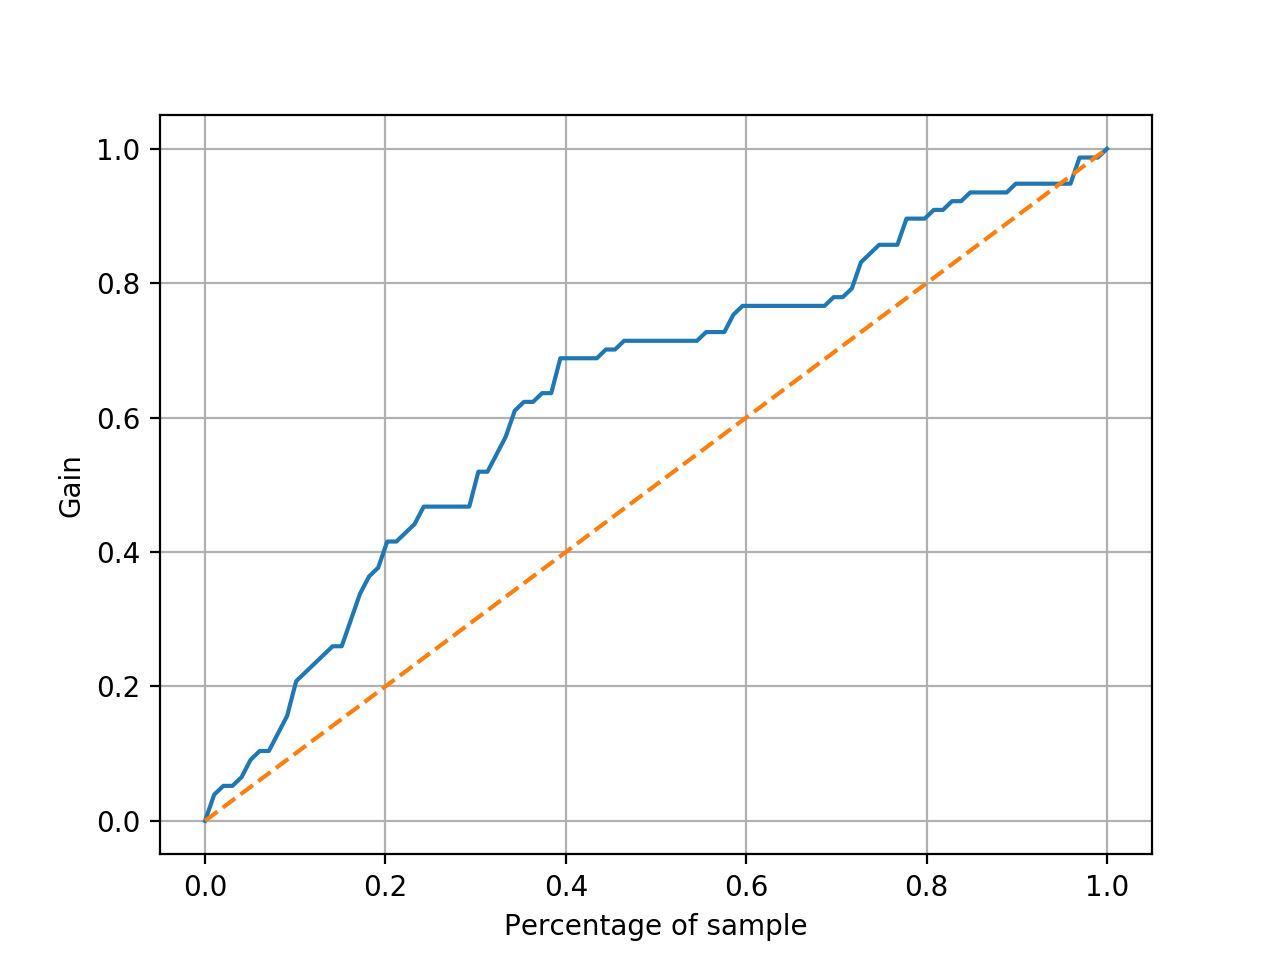

0.2077922077922078


In [11]:
sort_prob= sorted(clf.predict_proba(x_test)[:,1],reverse = True )
index_sort = (-clf.predict_proba(x_test)[:,1]).argsort()
thres = np.linspace(0,1,100)
score = []
for t in range(len(thres)):
    len_thres = int(np.ceil(len(y_test)*thres[t]))
    y_thres_test = []
    for i in range(len_thres):
        y_thres_test.append(y_test[y_test.index[index_sort[i]]])
    score.append(sum(y_thres_test)*1.0 / sum(y_test))
%matplotlib notebook
plt.plot(thres,score)
plt.plot(thres,thres,'--')
plt.xlabel('Percentage of sample')
plt.ylabel('Gain')
plt.grid()
print(score[10])

<IPython.core.display.Javascript object>


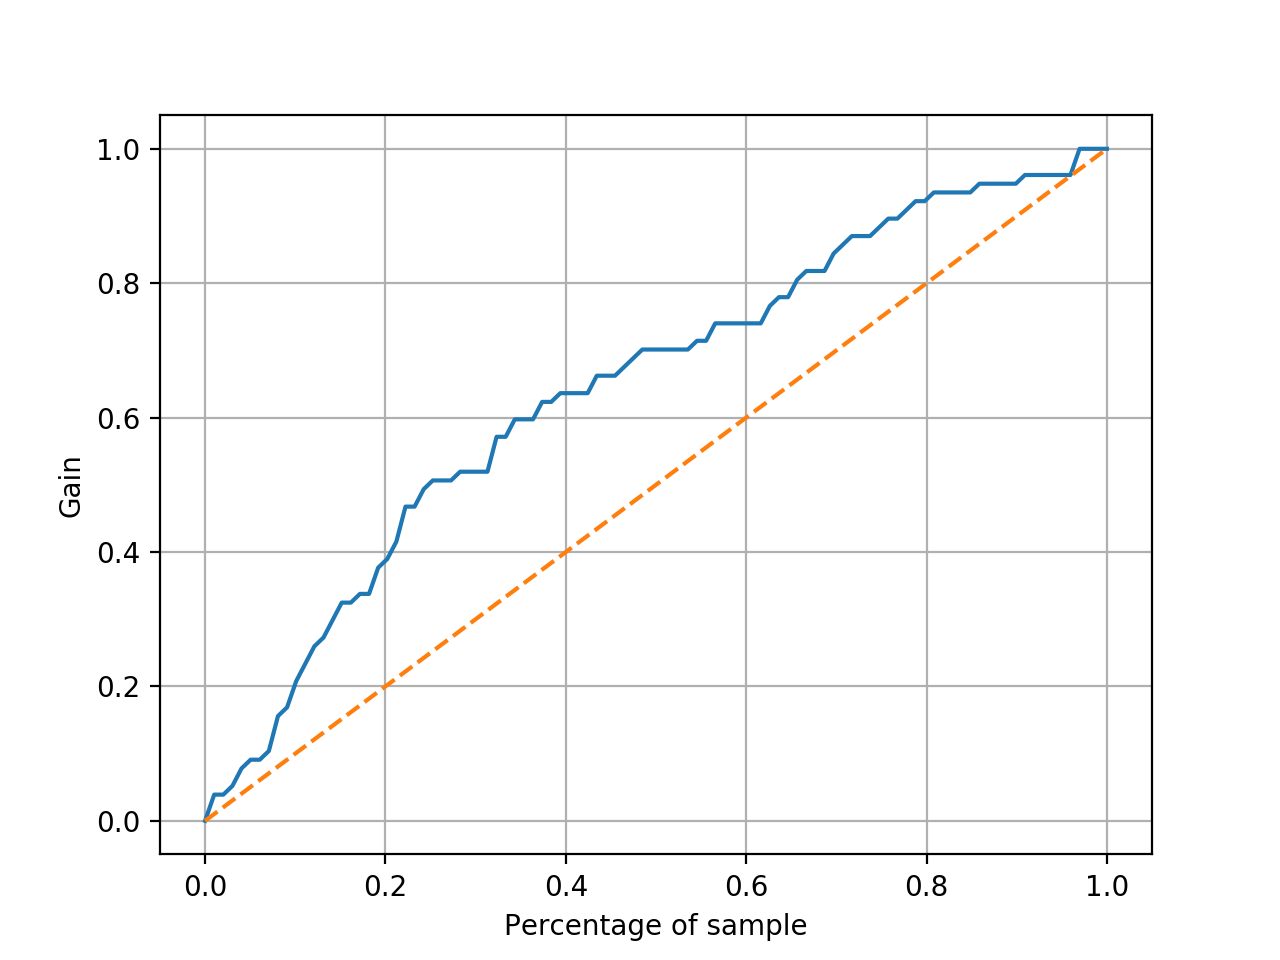

0.2077922077922078


In [12]:
sort_prob= sorted(clf_pca.predict_proba(x_test_pca)[:,1],reverse = True )
index_sort = (-clf_pca.predict_proba(x_test_pca)[:,1]).argsort()
thres = np.linspace(0,1,100)
score = []
for t in range(len(thres)):
    len_thres = int(np.ceil(len(y_test)*thres[t]))
    y_thres_test = []
    for i in range(len_thres):
        y_thres_test.append(y_test[y_test.index[index_sort[i]]])
    score.append(sum(y_thres_test)*1.0 / sum(y_test))
%matplotlib notebook
plt.plot(thres,score)
plt.plot(thres,thres,'--')
plt.xlabel('Percentage of sample')
plt.ylabel('Gain')
plt.grid()
print(score[10])

<IPython.core.display.Javascript object>


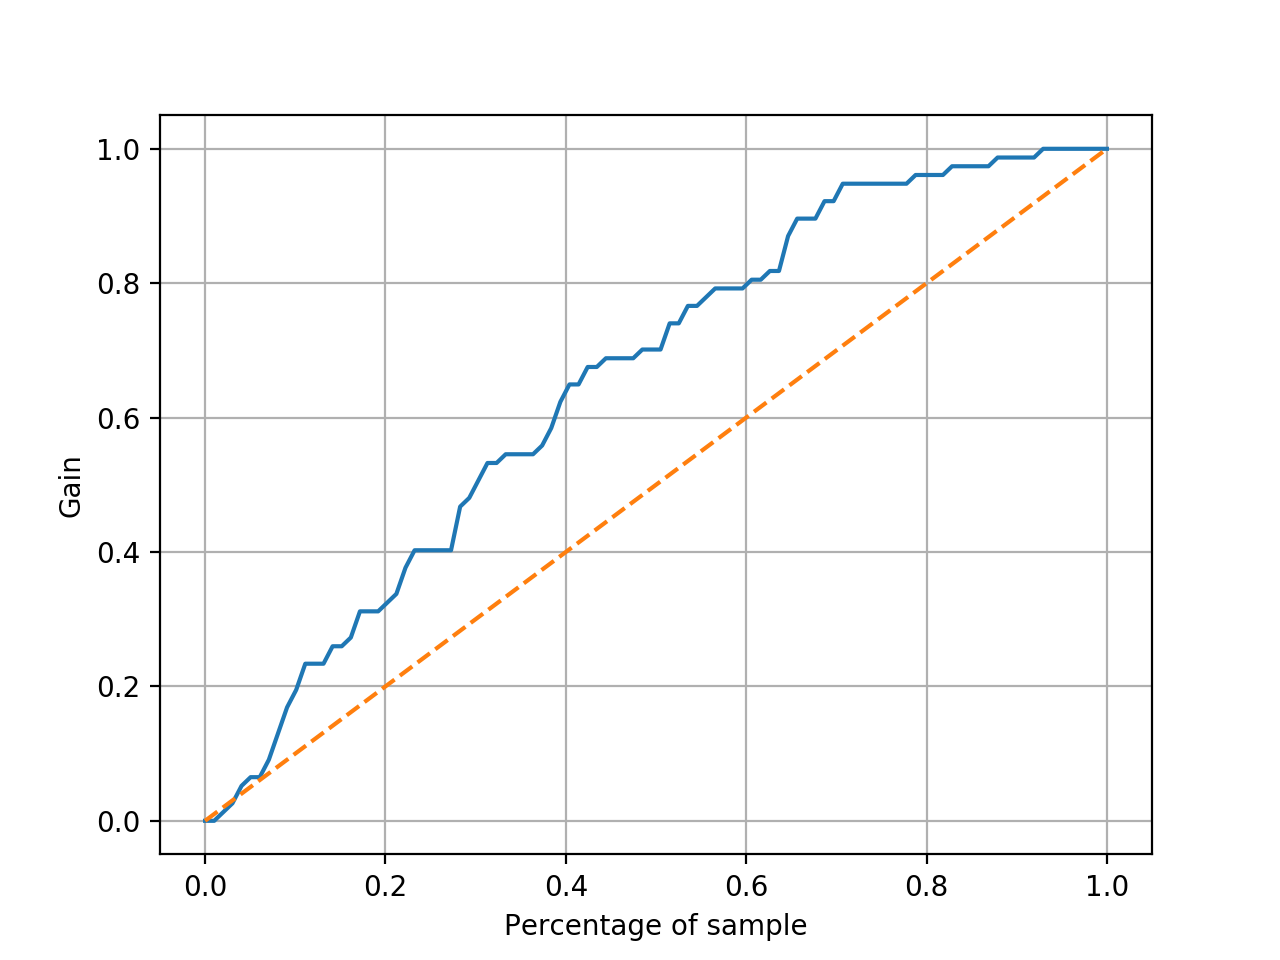

0.19480519480519481


In [13]:
sort_prob= sorted(clf_oversampling.predict_proba(x_test)[:,1],reverse = True )
index_sort = (-clf_oversampling.predict_proba(x_test)[:,1]).argsort()
thres = np.linspace(0,1,100)
score = []
for t in range(len(thres)):
    len_thres = int(np.ceil(len(y_test)*thres[t]))
    y_thres_test = []
    for i in range(len_thres):
        y_thres_test.append(y_test[y_test.index[index_sort[i]]])
    score.append(sum(y_thres_test)*1.0 / sum(y_test))
%matplotlib notebook
plt.plot(thres,score)
plt.plot(thres,thres,'--')
plt.xlabel('Percentage of sample')
plt.ylabel('Gain')
plt.grid()
print(score[10])

<IPython.core.display.Javascript object>


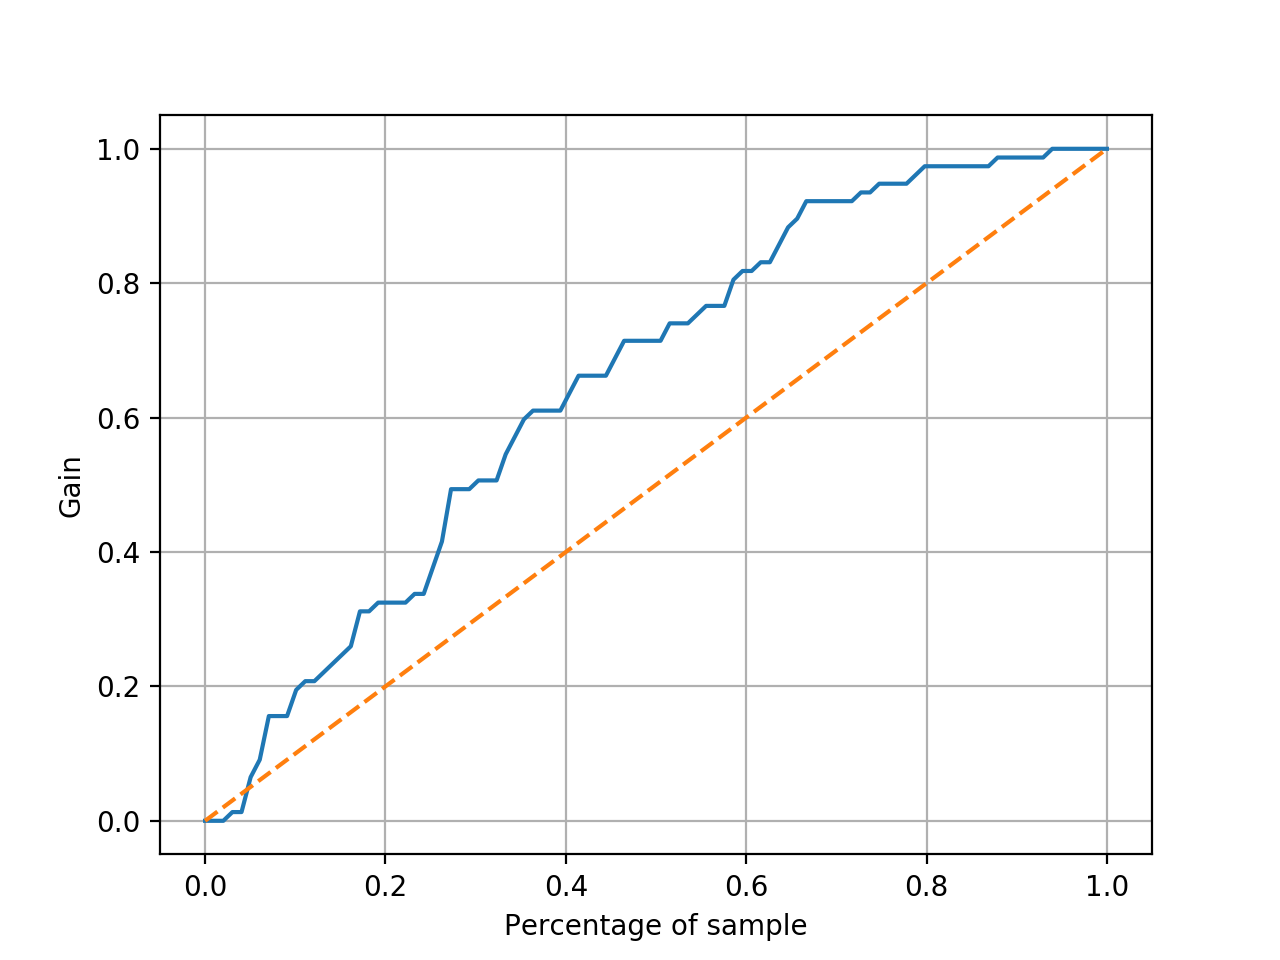

0.19480519480519481


In [14]:
sort_prob= sorted(clf_oversampling_pca.predict_proba(x_test_pca)[:,1],reverse = True )
index_sort = (-clf_oversampling_pca.predict_proba(x_test_pca)[:,1]).argsort()
thres = np.linspace(0,1,100)
score = []
for t in range(len(thres)):
    len_thres = int(np.ceil(len(y_test)*thres[t]))
    y_thres_test = []
    for i in range(len_thres):
        y_thres_test.append(y_test[y_test.index[index_sort[i]]])
    score.append(sum(y_thres_test)*1.0 / sum(y_test))
%matplotlib notebook
plt.plot(thres,score)
plt.plot(thres,thres,'--')
plt.xlabel('Percentage of sample')
plt.ylabel('Gain')
plt.grid()
print(score[10])